# `Importing The Library `

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve , precision_recall_curve , auc , make_scorer , recall_score , accuracy_score , precision_score , confusion_matrix , f1_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import os

# `Mount The Google Drive `

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
data_dir = '/content/drive/MyDrive/trainingSet.csv'

# `Read the CSV file using Pandas`

In [ ]:
# read the csv file using pandas
import pandas as pd
data_frame = pd.read_csv(data_dir)

In [ ]:
# we can print the first five elements
data_frame.head()

,Unnamed: 0,age_final,altitude,anc_freq,attend_dlvry,current_anc,current_preg_vac,duration_pregnancy,educ_category,ethnicity,...,other_place,place_dlvry,preg_total,prev_outcome,religion,residence,rltn_head,totalborn,type,type_current_vac
0,10236,31.0,2597.0,0.0,2,999.0,999.0,0.0,6.0,1.0,...,999.0,2,1.0,0.0,1.0,0,2.0,1,1,999.0
1,11624,35.0,1780.0,0.0,6,999.0,999.0,0.0,1.0,1.0,...,999.0,5,3.0,0.0,1.0,1,2.0,1,1,999.0
2,10365,38.0,2526.0,4.0,2,999.0,999.0,0.0,1.0,1.0,...,999.0,2,0.0,4.0,1.0,1,2.0,1,1,999.0
3,10034,61.0,1858.0,0.0,5,999.0,999.0,0.0,1.0,1.0,...,999.0,5,0.0,3.0,1.0,1,2.0,1,1,999.0
4,11056,52.0,1766.0,0.0,4,999.0,999.0,0.0,1.0,1.0,...,999.0,5,8.0,0.0,1.0,1,2.0,1,1,999.0


In [ ]:
# we can print the last five elements of the dataset
data_frame.tail()

,Unnamed: 0,age_final,altitude,anc_freq,attend_dlvry,current_anc,current_preg_vac,duration_pregnancy,educ_category,ethnicity,...,other_place,place_dlvry,preg_total,prev_outcome,religion,residence,rltn_head,totalborn,type,type_current_vac
12913,5191,38.603124,2693.190627,0.0,5,999.0,999.0,0.0,1.0,1.0,...,999.0,5,0.496095,3.603124,1.0,1,2.0,1,3,999.0
12914,13418,36.000000,2581.000000,0.0,6,999.0,999.0,0.0,5.0,1.0,...,999.0,5,3.000000,0.000000,2.0,0,8.0,1,1,999.0
12915,5390,44.000000,1601.000000,3.0,7,999.0,999.0,0.0,1.0,1.0,...,999.0,5,0.000000,6.000000,1.0,1,2.0,1,1,999.0
12916,860,45.000000,2626.000000,4.0,2,999.0,999.0,0.0,1.0,1.0,...,999.0,2,0.000000,7.000000,1.0,1,2.0,1,1,999.0
12917,7270,49.000000,2642.000000,0.0,6,999.0,999.0,0.0,1.0,1.0,...,999.0,5,7.000000,0.000000,1.0,1,2.0,1,1,999.0


In [ ]:
# The length of the entire dataset
total_count = len(data_frame)
print("The length of the data is = {}".format(total_count))

The length of the data is = 12918


In [ ]:
data_frame.describe()

,Unnamed: 0,age_final,altitude,anc_freq,attend_dlvry,current_anc,current_preg_vac,duration_pregnancy,educ_category,ethnicity,...,other_place,place_dlvry,preg_total,prev_outcome,religion,residence,rltn_head,totalborn,type,type_current_vac
count,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,...,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000
mean,7175.730299,37.404104,2361.091163,3.564458,4.001393,990.052413,990.055989,8.959548,2.220991,1.001006,...,998.845332,3.861898,11.203866,1.555982,1.024071,0.761883,2.299811,1.038086,1.252516,990.060546
std,4147.218209,7.533091,406.129350,44.137460,1.676657,90.020984,89.985197,90.139287,1.966177,0.036264,...,12.429854,1.574543,89.956723,19.722285,0.151790,0.425948,1.125758,0.305970,0.575512,89.943464
min,0.000000,8.000000,1165.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,3580.250000,32.000000,1922.000000,0.000000,2.000000,999.000000,999.000000,0.000000,1.000000,1.000000,...,999.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,999.000000
50%,7161.500000,37.000000,2596.000000,0.000000,4.000000,999.000000,999.000000,0.000000,1.000000,1.000000,...,999.000000,5.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,999.000000
75%,10766.750000,42.000000,2644.000000,2.000000,5.000000,999.000000,999.000000,0.000000,3.157198,1.000000,...,999.000000,5.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,999.000000
max,14353.000000,109.000000,2927.000000,999.000000,7.000000,999.000000,999.000000,999.000000,9.000000,3.000000,...,999.000000,6.000000,999.000000,999.000000,4.000000,1.000000,8.000000,10.000000,3.000000,999.000000


In [ ]:
data_frame["type"].value_counts()

1    10576
2     1422
3      920
Name: type, dtype: int64

In [ ]:
X = data_frame.drop(columns = ["type"])
y = data_frame["type"]

# `Plot The Class Distribuition `

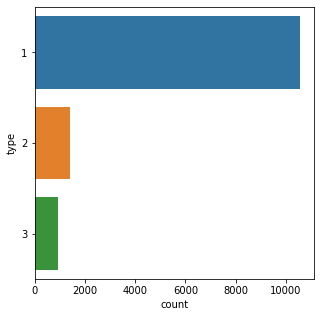

In [ ]:
# plot the class distribuition
plt.figure(figsize = (5 , 5))
sns.countplot(y = data_frame["type"])
plt.show()

# `Handling Missing Data`

# Drop Columns with missing values and Replace some of them with their means

In [ ]:
# dropping these will actually increases the accuracy
X = X.drop(["type_current_vac" , "current_preg_vac" , "current_anc" , "freq_tt_vac" , "other_place"] , axis = 1)

In [ ]:
# replace some of the features with their mean values
X = X.replace(999 , X["anc_freq"].mean())
X = X.replace(999 , X["duration_pregnancy"].mean())
X = X.replace(999 , X["preg_total"].mean())
X = X.replace(999 , X["prev_outcome"].mean())

In [ ]:
# check if a column has 999 entry
print('No. of 999 in anc_freq ', X[X['anc_freq']==999].shape[0])

No. of 999 in anc_freq  0


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 225 kB 4.9 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


# `Class Distribuition `

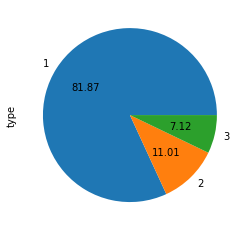

In [ ]:
import matplotlib.pyplot as plt
y.value_counts().plot.pie(autopct = "%.2f")

# `Random Over Sampling`

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy= "not majority")
X_oversample , y_oversample = ros.fit_resample(X,y)

#` Over Sampling `

In [ ]:
y_oversample.value_counts()

1    10576
3    10576
2    10576
Name: type, dtype: int64

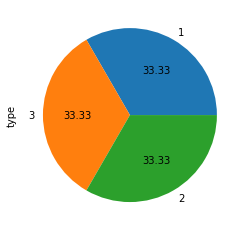

In [ ]:
import matplotlib.pyplot as plt
y_oversample.value_counts().plot.pie(autopct = "%.2f")

# `Corelation Among Features`

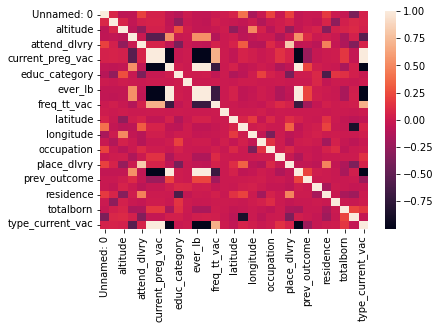

In [ ]:
sns.heatmap(data_frame.corr());

# `Simple Impuatation`

In [ ]:
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer()
# data_frame_train_imputed = impute.fit_transform(data_frame)

# `Feature Selection `

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif

FeatureSelection = SelectKBest(score_func= chi2 ,k = 3)
X_oversample = FeatureSelection.fit_transform(X_oversample, y_oversample)

In [ ]:
# show the X dimension
print("X shape is " , X_oversample.shape)

X shape is  (31728, 3)


# `Feature Scaling `

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(X_train)
# x_validation = scaler.fit_transform(X_validation)

# `Splitting The Data `

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_oversample, y_oversample, test_size = 0.1, random_state=44, shuffle =True)

In [ ]:
print("The length of the X-train is " , len(X_train))
print("The length of the X-test is " , len(X_validation))
print('The entire length of the data set' , len(X))

The length of the X-train is  28555
The length of the X-test is  3173
The entire length of the data set 12918


In [ ]:
y_train.value_counts()

1    9553
2    9511
3    9491
Name: type, dtype: int64

In [ ]:
y_validation.value_counts()

3    1085
2    1065
1    1023
Name: type, dtype: int64

# `Over sampling the validation dataset `

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy= "not majority")
X_validation , y_validation = ros.fit_resample(X_validation , y_validation)

In [ ]:
y_validation.value_counts()

1    1085
3    1085
2    1085
Name: type, dtype: int64

# `Logistic Regression `

In [ ]:
import time
LogisticRegressionModel = LogisticRegression(max_iter = 100)
t_initial = time.time()
LogisticRegressionModel.fit(X_train , y_train)
print("The Training time " , time.time() - t_initial , "milli-second")

The Training time  1.317610502243042 milli-second


In [ ]:
print("Logistic Regression Model Train Score is :" , LogisticRegressionModel.score(X_train , y_train))

Logistic Regression Model Train Score is : 0.9036596042724566


#` Confusion Matrix For Logistic Regression `

In [ ]:
# Prediction on the test set
t_initial = time.time()
y_pred_LR = LogisticRegressionModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print("Validation Accuracy :" , accuracy_score(y_validation , y_pred_LR))

The Validation time  0.0007309913635253906 milli-second
Validation Accuracy : 0.896774193548387


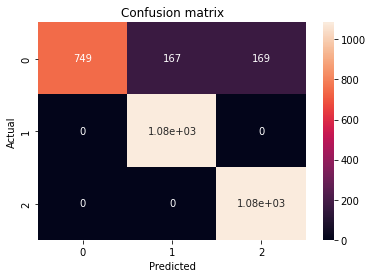

In [ ]:
CM_LR = confusion_matrix(y_validation , y_pred_LR)
sns.heatmap(CM_LR , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

# `Recall Score , Precision Score and F1 Score For Logistic Regression `

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_LR , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_LR , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_LR , average = "micro"))

The F1 Score is : 0.896774193548387
The Recall score is : 0.896774193548387
The Precision score is : 0.896774193548387


* Sklearn f1 score multiclass is average of f1 scores from each classes. The sklearn provide the various methods to do the averaging. We may provide the averaging methods as parameters in the f1_score() function. You may choose any o the value from this list {‘micro’, ‘macro’, ‘samples’,’weighted’, ‘binary’} and parameterize into the function. The default value is None. This default value works in the case of the binary classification.

'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

# `Decision Tree Model `

In [ ]:
t_initial = time.time()
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=41,random_state=44)
DecisionTreeClassifierModel.fit(X_train, y_train)
print("The Training time " , time.time() - t_initial , "milli-second")

The Training time  0.016753673553466797 milli-second


In [ ]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))

DecisionTreeClassifierModel Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_DT = DecisionTreeClassifierModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print("Validation Accuracy " , accuracy_score(y_validation , y_pred_DT))

The Validation time  0.0007581710815429688 milli-second
Validation Accuracy  1.0


# `Confusion Matrix For Decision Tree `

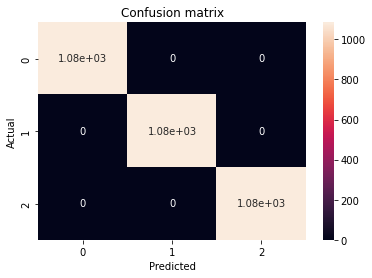

In [ ]:
CM_DT = confusion_matrix(y_validation , y_pred_DT)
sns.heatmap(CM_DT , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

# `F1 Score , Precision Score , Recall Score For the Decision Tree `

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_DT , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_DT , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_DT , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `Random Forest Model `

In [ ]:
t_initial = time.time()
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=14, n_estimators=100, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)
print("The Training time " , time.time() - t_initial , "milli-second")

The Training time  1.2939138412475586 milli-second


In [ ]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))

RandomForestClassifierModel Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_RF = RandomForestClassifierModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print("Validation Accuracy" ,accuracy_score(y_validation , y_pred_RF))

The Validation time  0.04023170471191406 milli-second
Validation Accuracy 1.0


# `Confusion Matrix For Random Forest Model `

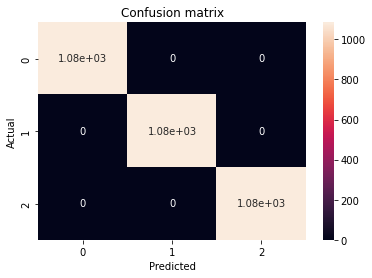

In [ ]:
CM_RF = confusion_matrix(y_validation , y_pred_RF)
sns.heatmap(CM_RF , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

# `The Precision , Recall and F1 Score For the Random Forest Model `

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_RF , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_RF , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_RF , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `Gradient Boosting Model `

In [ ]:
t_initial = time.time()
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=44)
GBCModel.fit(X_train, y_train)
print("The Training time " , time.time() - t_initial , "milli-second")
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))

The Training time  6.465634346008301 milli-second
GBCModel Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_GB = RandomForestClassifierModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print("Validation Accuracy :" , accuracy_score(y_validation , y_pred_GB))

The Validation time  0.045926570892333984 milli-second
Validation Accuracy : 1.0


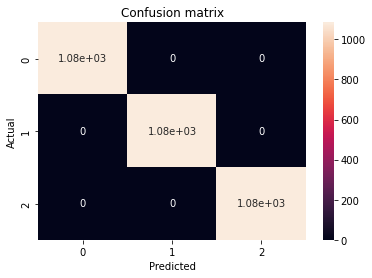

In [ ]:
CM_GB = confusion_matrix(y_validation , y_pred_GB)
sns.heatmap(CM_GB , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

# `F1 Score , Precision Score , Recall Score For the Gradient Boosting Model `

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_GB , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_GB , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_GB , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `AdaBoost Classifier `

In [ ]:
# Create adaboost classifer object
AdaBoostModel = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
t_initial = time.time()
AdaBoostModel.fit(X_train, y_train)
print("The Training time " , time.time() - t_initial , "milli-second")

The Training time  0.732534646987915 milli-second


In [ ]:
print('AdaBoost Train Score is : ' , AdaBoostModel.score(X_train, y_train))

AdaBoost Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_AB = AdaBoostModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print("Validation Accuracy :" , accuracy_score(y_validation , y_pred_AB))

The Validation time  0.042832374572753906 milli-second
Validation Accuracy : 1.0


# `Confusion Matrix For AdaBoost `

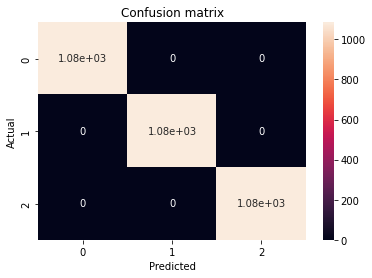

In [ ]:
CM_AB = confusion_matrix(y_validation , y_pred_AB)
sns.heatmap(CM_AB , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

# `Precision , Recall and F1 Score For Adaptive Boost`

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_AB , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_AB , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_AB , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `KNN Classifier`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNModel = KNeighborsClassifier(n_neighbors=1)
t_initial = time.time()
KNNModel.fit(X_train,y_train)
print("The Training time " , time.time() - t_initial , "milli-second")

The Training time  0.02554488182067871 milli-second


In [ ]:
print('KNN Train Score is : ' , KNNModel.score(X_train, y_train))

KNN Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_KNN = KNNModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print("Validation Accuracy :" , accuracy_score(y_validation , y_pred_KNN))

The Validation time  0.19300055503845215 milli-second
Validation Accuracy : 1.0


# `Confusion Matrix For KNN `

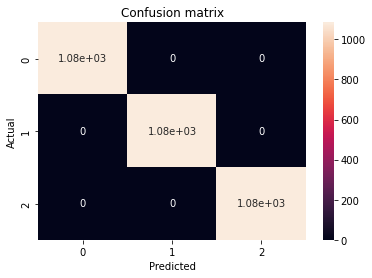

In [ ]:
CM_KNN = confusion_matrix(y_validation , y_pred_KNN)
sns.heatmap(CM_KNN , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

# `Precision , Recall and F1 Score `

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_KNN , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_KNN , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_KNN , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `Ensemble Methods Voting Classifier `

In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('LRModel', LogisticRegressionModel),
                                                     ('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel),
                                                     ('ADBModel' , AdaBoostModel),
                                                     ('KNNModel' , KNNModel) ,
                                                    ],
                                         voting='hard')

In [ ]:
t_initial = time.time()
VotingClassifierModel.fit(X_train, y_train)
print("The Training time " , time.time() - t_initial , "milli-second")
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))

The Training time  19.853009939193726 milli-second
VotingClassifierModel Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_VT = VotingClassifierModel.predict(X_validation)
print("The Validation time " , time.time() - t_initial , "milli-second")
print('Testing Accuracy :' , accuracy_score(y_validation, y_pred_VT))

The Validation time  0.44545435905456543 milli-second
Testing Accuracy : 1.0


# `Choosing The Best Model `

In [ ]:
# we chose random forest as our model
import time
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=14, n_estimators=100, random_state=44)
t_initial = time.time()
RandomForestClassifierModel.fit(X_train, y_train)
print("The training time " , time.time() - t_initial , "milli-second")

The training time  2.715005874633789 milli-second


In [ ]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))

RandomForestClassifierModel Train Score is :  1.0


In [ ]:
t_initial = time.time()
y_pred_RF = RandomForestClassifierModel.predict(X_validation)
print("Validation Accuracy" ,accuracy_score(y_validation , y_pred_RF))
print("The validating time " , time.time() - t_initial , "milli-second")

Validation Accuracy 1.0
The validating time  0.05869936943054199 milli-second


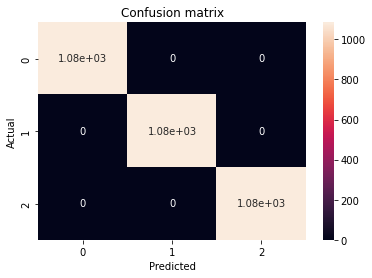

In [ ]:
CM_RF = confusion_matrix(y_validation , y_pred_RF)
sns.heatmap(CM_RF , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_RF , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_RF , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_RF , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `Saving The Model`

In [ ]:
import pickle
data = {"model":RandomForestClassifierModel}
with open("Saved_Model.pkl" , "wb") as file:
  pickle.dump(data , file)

# `To load the model `

In [ ]:
with open("Saved_Model.pkl" , "rb") as file:
  data = pickle.load(file)
random_forest = data["model"]

In [ ]:
print('RandomForestClassifierModel Train Score is : ' , random_forest.score(X_train, y_train))

RandomForestClassifierModel Train Score is :  1.0


In [ ]:
y_pred_RF = random_forest.predict(X_validation)
print("Validation Accuracy" ,accuracy_score(y_validation , y_pred_RF))

Validation Accuracy 1.0


In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_RF , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_RF , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_RF , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


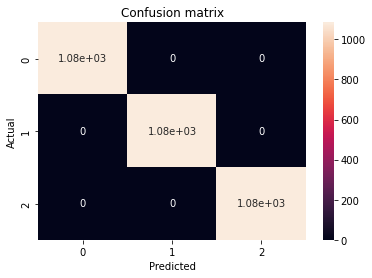

In [ ]:
CM_RF = confusion_matrix(y_validation , y_pred_RF)
sns.heatmap(CM_RF , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()

In [ ]:
print("The F1 Score is :" , f1_score(y_validation , y_pred_RF , average = "micro"))
print("The Recall score is :" , recall_score(y_validation , y_pred_RF , average = "micro"))
print("The Precision score is :" , precision_score(y_validation , y_pred_RF , average = "micro"))

The F1 Score is : 1.0
The Recall score is : 1.0
The Precision score is : 1.0


# `Testing Dataset `

In [ ]:
import os
data_dir = '/content/drive/MyDrive/testSetFinal.csv'

In [ ]:
# # read the csv file using pandas
import pandas as pd
data_frame = pd.read_csv(data_dir)

In [ ]:
# dropping these will actually increases the accuracy
# dropping these will actually increases the accuracy
data_frame = data_frame.drop(["type_current_vac" , "current_preg_vac" , "current_anc" , "freq_tt_vac" , "other_place"] , axis = 1)

In [ ]:
# # replace some of the features with their mean values
data_frame =  data_frame.replace(999 , data_frame["anc_freq"].mean())
data_frame =  data_frame.replace(999 ,  data_frame["duration_pregnancy"].mean())
data_frame =  data_frame.replace(999 ,  data_frame["preg_total"].mean())
data_frame =  data_frame.replace(999 ,  X_test["prev_outcome"].mean())

In [ ]:
X = data_frame.drop(columns = ["type"])
y = data_frame["type"]

In [ ]:
y_pred_RF = RandomForestClassifierModel.predict(X)
print("Validation Accuracy" ,accuracy_score(y , y_pred_RF))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored

In [ ]:
print("The F1 Score is :" , f1_score(y_test , y_pred_RF , average = "micro"))
print("The Recall score is :" , recall_score(y_test , y_pred_RF , average = "micro"))
print("The Precision score is :" , precision_score(y_test , y_pred_RF , average = "micro"))

ValueError: ignored

In [ ]:
CM_RF = confusion_matrix(y_test , y_pred_RF)
sns.heatmap(CM_RF , annot=True, fmt='.3g')
plt.title('Confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

plt.show()